In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from class2 import facies_classification, Petrophysics, rename_columns, rearrange_columns

In [2]:
well = pd.read_csv('data/freeman_well_4_eng.csv')
well.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,Facies_code
0,7682.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0
1,7683.0,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0
2,7683.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0
3,7684.0,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0
4,7684.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0


In [3]:
test = Petrophysics(well)

In [4]:
y = test.shale_volume(1)

In [5]:
z = test.porosity_effective(125.5)

In [6]:
well.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,Facies,velocity,Facies_code,vshale,effective porosity
0,7682.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0,0.0,0.2657
1,7683.0,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0,0.0,0.2657
2,7683.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0,0.0,0.2657
3,7684.0,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0,0.0,0.2657
4,7684.5,39.0321,0.9332,137.507,2.2382,0.5983,0.2657,175.29364,1.0,7272.357044,0,0.0,0.2657


In [54]:
well.to_csv('data/tee.csv', index=False)

In [7]:
df = well.dropna()
df.isnull().sum()

Depth                 0
GR                    0
Log_ILD               0
DT                    0
RHOB                  0
NPHI                  0
PHI                   0
PERM                  0
Facies                0
velocity              0
Facies_code           0
vshale                0
effective porosity    0
dtype: int64

In [23]:
X = df[['Depth', 'Log_ILD', 'NPHI','RHOB', 'vshale', 'effective porosity']]
y = df['PERM']

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the models to evaluate
models = {
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [20, 50, 100, 150],
            'max_depth': [10, 20, 30]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'learning_rate': [0.05, 0.1, 0.2],
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7]
        }
    }
}

In [26]:
import joblib


# Perform grid search on each model using cross-validation
results = []
for model_name, model in models.items():
    clf = GridSearchCV(model['model'], model['params'], cv=5, n_jobs=-1, return_train_score=False)
    clf.fit(X_train, y_train)
    best_params = clf.best_params_
    
    # Evaluate best model on test set
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = clf.score(X_test, y_test)
    results.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': best_params,
        'RMSE': rmse,
        'R-squared': r2
    })
    
    # Save the best model for each method
    joblib.dump(clf.best_estimator_, f"{model_name}_best_model.pkl")

result_df = pd.DataFrame(results, columns=['model', 'best_params', 'best_score', 'RMSE', 'R-squared'])
result_df

,model,best_params,best_score,RMSE,R-squared
0,random_forest,"{'max_depth': 10, 'n_estimators': 50}",0.912108,113041.332067,0.797255
1,decision_tree,"{'max_depth': 5, 'min_samples_split': 2}",0.847030,210257.505050,0.298578
2,gradient_boosting,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.886013,141892.116634,0.680558


In [12]:
result_df.to_csv('data/best_model.csv', index=False)

In [49]:
model = RandomForestRegressor(n_estimators = 50)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7467015985231759

In [56]:
model1 = joblib.load('random_forest_best_model.pkl')
model1.score(X_test, y_test)

0.7972547491207392

In [33]:
# Predict y values for x_test
y_pred = model.predict(X_test)

X_test_df = pd.DataFrame(X_test, columns=['Depth', 'Log_ILD', 'NPHI', 'RHOB', 'vshale', 'effective porosity'])

# Create a dataframe with x_test, y_test, and y_predict
results_df = pd.DataFrame({'Depth': X_test_df['Depth'],
                           'Log_ILD': X_test_df['Log_ILD'],
                           'NPHI': X_test_df['NPHI'],
                           'RHOB': X_test_df['RHOB'],
                           'vshale': X_test_df['vshale'],
                           'effective porosity': X_test_df['effective porosity'],
                           'Actual Permeability': y_test,
                           'Predicted Permeability': y_pred})

# Print the dataframe
results_df.to_csv('results.csv', index=False)
print(results_df)


        Depth   Log_ILD    NPHI    RHOB  vshale  effective porosity  \
2039   8717.0  616.4568  0.2844  1.9625  0.0038            -0.03340   
1954   8674.5    0.7247  0.4810  2.2667  0.5051           -63.14275   
2010   8702.5    3.9650  0.3231  2.1325  0.2120           -26.27210   
243    7807.0    0.9332  0.4465  2.2382  0.4541           -56.72385   
6498  10948.5    0.6934  0.4265  2.3774  0.6690           -83.78360   
...       ...       ...     ...     ...     ...                 ...   
5548  10473.0    1.0791  0.3980  2.3905  0.7449           -93.31755   
6492  10945.5    0.8569  0.4157  2.3775  0.5158           -64.55710   
4601   9999.5    1.3881  0.3531  2.4125  0.6252           -78.30940   
348    7859.5    0.9778  0.4561  2.2400  0.4614           -57.64120   
3015   9205.0    0.7131  0.5062  2.3047  0.4859           -60.75765   

      Actual Permeability  Predicted Permeability  
2039        630074.011837           939346.164435  
1954            75.128536               75.

In [34]:
df2 = pd.read_csv('results.csv')
df2.head()

,Depth,Log_ILD,NPHI,RHOB,vshale,effective porosity,Actual Permeability,Predicted Permeability
0,8717.0,616.4568,0.2844,1.9625,0.0038,-0.03340,630074.011837,939346.164435
1,8674.5,0.7247,0.4810,2.2667,0.5051,-63.14275,75.128536,75.094499
2,8702.5,3.9650,0.3231,2.1325,0.2120,-26.27210,4051.561857,4011.973744
3,7807.0,0.9332,0.4465,2.2382,0.4541,-56.72385,175.293640,175.293640
4,10948.5,0.6934,0.4265,2.3774,0.6690,-83.78360,2.805145,2.808388


In [38]:
# imports
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

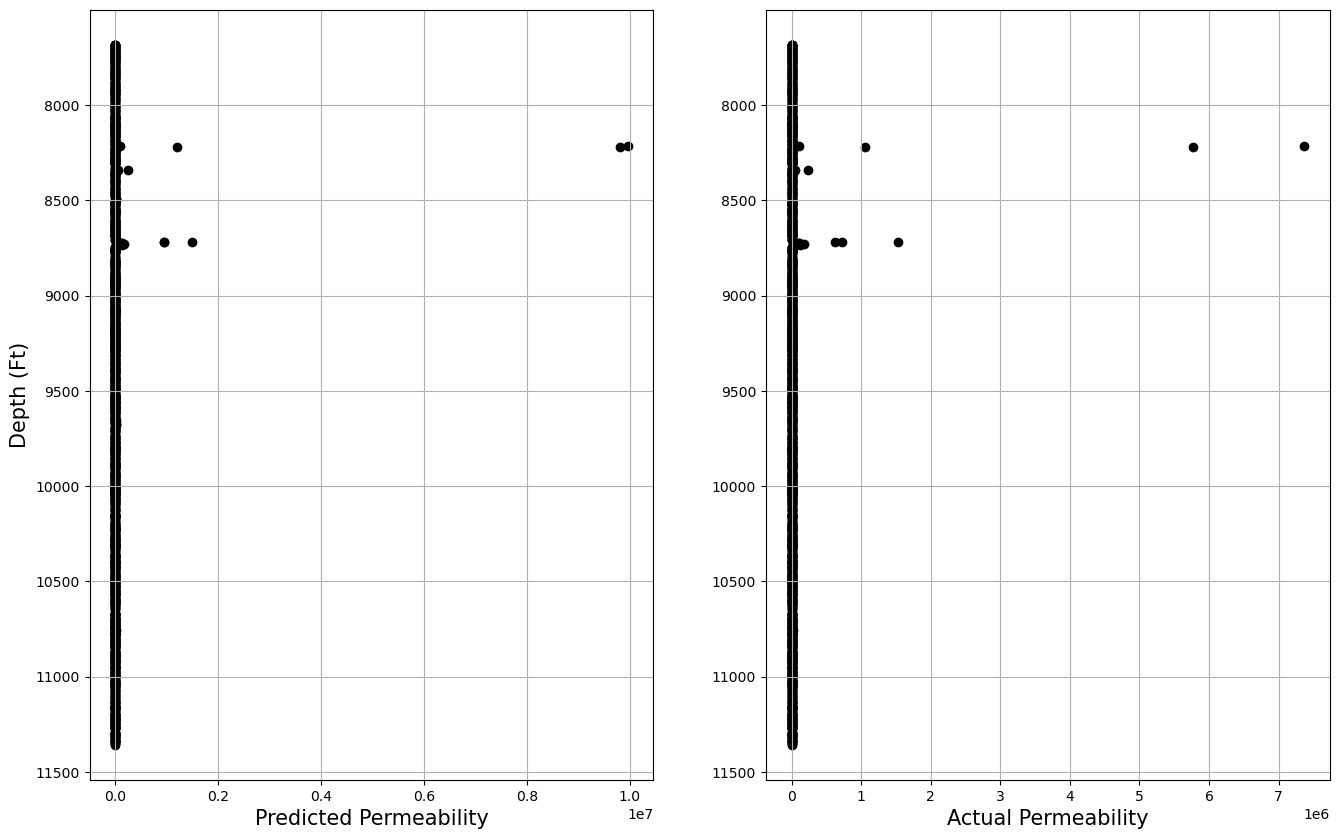

In [45]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,10),linewidth=3)

curves = ['Predicted Permeability','Actual Permeability']

for i in range(len(curves)):
    ax[i].scatter(df2[curves[i]],df2['Depth'],c='k')
    ax[i].set_xlabel(curves[i],fontsize=15)
    ax[0].set_ylabel('Depth (Ft)',fontsize=15)
    ax[i].yaxis.grid(True)
    ax[i].xaxis.grid(True)
    ax[i].invert_yaxis()

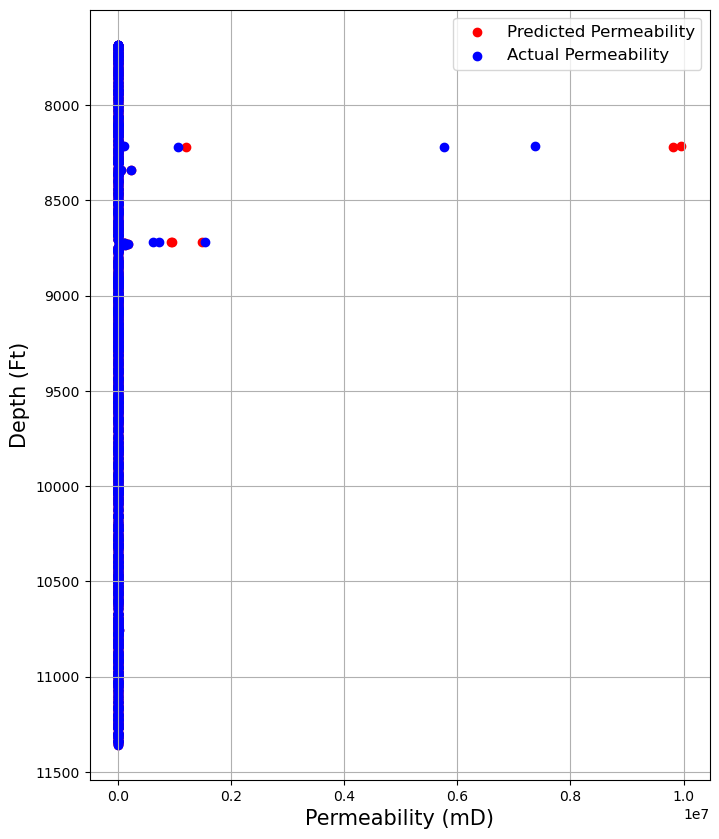

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10), linewidth=3)

ax.scatter(df2['Predicted Permeability'], df2['Depth'], c='r', label='Predicted Permeability')
ax.scatter(df2['Actual Permeability'], df2['Depth'], c='b', label='Actual Permeability')
ax.set_xlabel('Permeability (mD)', fontsize=15)
ax.set_ylabel('Depth (Ft)', fontsize=15)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.invert_yaxis()
ax.legend(fontsize=12)
plt.show()

In [40]:
sorted_df = df2.sort_values(by=['Depth'], ascending=True)
sorted_df.head()

,Depth,Log_ILD,NPHI,RHOB,vshale,effective porosity,Actual Permeability,Predicted Permeability
1208,7684.0,0.9332,0.5983,2.2382,0.0,0.2657,175.29364,175.29364
774,7685.0,0.9332,0.5983,2.2382,0.0,0.2657,175.29364,175.29364
128,7686.0,0.9332,0.5983,2.2382,0.0,0.2657,175.29364,175.29364
530,7686.5,0.9332,0.5983,2.2382,0.0,0.2657,175.29364,175.29364
503,7688.0,0.9332,0.5983,2.2382,0.0,0.2657,175.29364,175.29364


In [43]:
sorted_df.describe()

,Depth,Log_ILD,NPHI,RHOB,vshale,effective porosity,Actual Permeability,Predicted Permeability
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1.458000e+03,1.458000e+03
mean,9511.930384,15.001202,0.424414,2.329771,0.560855,-70.180746,1.262432e+04,1.761998e+04
std,1044.682881,157.716826,0.067622,0.079661,0.181227,22.779960,2.511371e+05,3.710645e+05
min,7684.000000,0.237500,0.113300,1.879800,-0.005500,-136.703700,1.336887e-01,1.278618e-01
25%,8639.250000,0.877050,0.384325,2.284825,0.506500,-82.416500,1.940762e+00,1.940427e+00
50%,9474.250000,1.019350,0.423600,2.343400,0.593550,-74.297850,7.689697e+00,7.704829e+00
75%,10422.750000,1.346575,0.465700,2.389700,0.658050,-63.344375,4.378552e+01,4.395288e+01
max,11357.000000,1950.000000,0.656900,2.479800,1.090600,0.955950,7.366803e+06,9.962649e+06


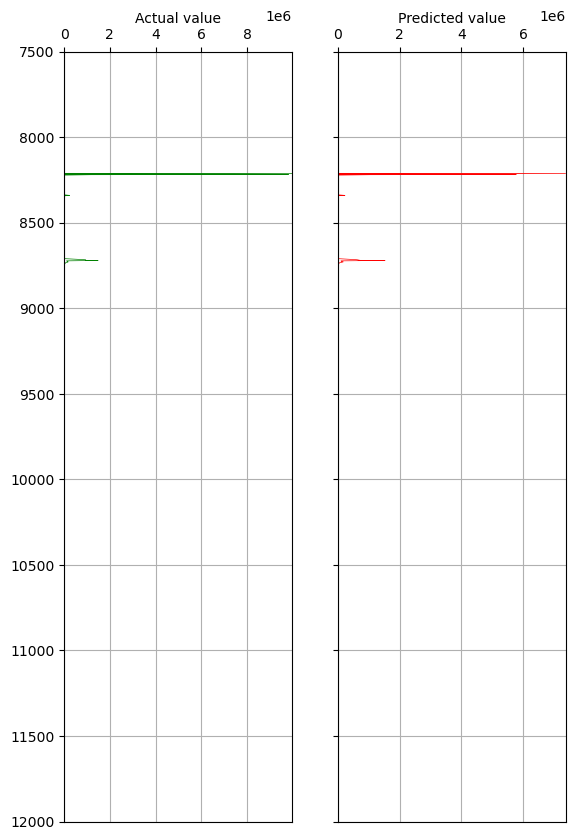

In [44]:
fig, axes = plt.subplots(figsize=(10, 10))
curve_names = ['Actual value', 'Predicted value']

# TODO: try to make it just two plots. Try it out and see how it works.

ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 3), (0, 1), rowspan=1, colspan=1)

ax1.plot('Predicted Permeability', 'Depth', data=sorted_df, color="green", lw=0.5)
ax1.set_xlim(sorted_df['Predicted Permeability'].min() - 10, sorted_df['Predicted Permeability'].max() + 10)

ax2.plot('Actual Permeability', 'Depth', data=sorted_df, color="red", lw=0.5)
ax2.set_xlim(sorted_df['Actual Permeability'].min() - 10, sorted_df['Actual Permeability'].max() + 10)

for i, ax in enumerate(fig.axes):
    ax.set_ylim(12000, 7500)

    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])

    if i == 3:
        ax.spines["top"].set_position(("axes", 1.08))
    else:
        ax.grid()

for ax in [ax2]:
     plt.setp(ax.get_yticklabels(), visible=False)